In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [11]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
# year = 2016

year_start_date = '2016-01-01'
year_end_date = '2016-12-31'
year_temp = calc_temps(year_start_date, year_end_date)
year_temp

[(56.0, 74.14421827631008, 84.0)]

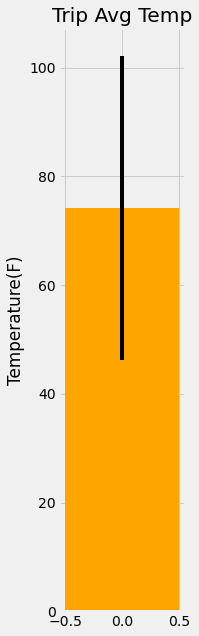

In [16]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
tmin = year_temp[0][0]
tavg = year_temp[0][1]
tmax = year_temp[0][2]
y_err = tmax-tmin

plt.figure(figsize =(2,10))
plt.bar(0, tavg, yerr=y_err, align = "center", width = 1, color ="orange", alpha = 1)
plt.ylim =(0,100)
plt.ylabel("Temperature(F)")
plt.title("Trip Avg Temp")
plt.savefig("Images/Trip Avg Temp1.jpg")
plt.show()

### Daily Rainfall Average

In [18]:
last_date = session.query(func.max(Measurement.date)).scalar()

date_one_yr_ago_dt = dt.datetime.strptime(last_date, '%Y-%m-%d') -dt.timedelta(days=365)
query_date = date_one_yr_ago_dt.strftime('%Y-%m-%d')

# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

results = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation,\
                        func.avg(Measurement.prcp)).filter(Measurement.station == Station.station, Measurement.date.between(query_date, last_date)).\
                        group_by(Measurement.station).order_by(Measurement.prcp.desc()).all()

print(results)

[('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.19894886363636372), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.45064024390243923), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.14142857142857151), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.12543396226415093), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.12105095541401273), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.044818941504178235), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0765)]


In [19]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = dt.datetime(2017, 8, 1)
end_date = dt.datetime(2017, 8, 7)

# Use the start and end date to create a range of dates
datelist = pd.date_range(start_date, periods=7).tolist()


# Strip off the year and save a list of strings in the format %m-%d
dates =[]
for date in datelist:
    dates.append(dt.datetime.strftime(date, '%m-%d'))
    
# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.

normals = []
for date in dates:
    normals.append(daily_normals(date))
    
print("Chosen Dates: Aug 23 to Aug 29 (7 day trip)")
for normal in normals:
    print(normal)





Chosen Dates: Aug 23 to Aug 29 (7 day trip)
[(67.0, 75.54, 83.0)]
[(68.0, 75.60377358490567, 84.0)]
[(70.0, 76.61111111111111, 85.0)]
[(69.0, 76.71153846153847, 84.0)]
[(69.0, 76.14814814814815, 82.0)]
[(67.0, 76.25, 83.0)]
[(71.0, 77.15686274509804, 83.0)]


In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normal_list = []
for normal in normals:
    normal_list.append(np.ravel(normal))
    
trip_normals = pd.DataFrame(normal_list, columns = ['tmin', 'tavg', 'tmax'])
trip_normals.index = [str(date.strftime('%Y-%m-%d')) for date in datelist]
trip_normals

,tmin,tavg,tmax
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0


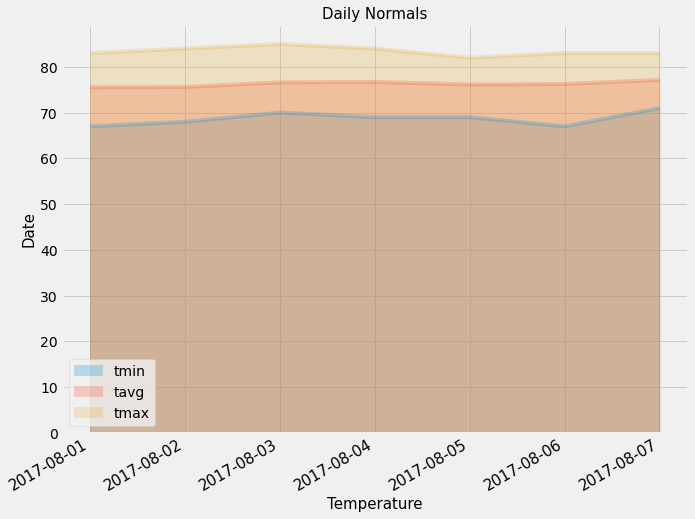

In [24]:
# Plot the daily normals as an area plot with `stacked=False`
fig, ax = plt.subplots(figsize = (10,7))
trip_normals.plot(kind='area', stacked=False, alpha = 0.25, ax = ax)
plt.title("Daily Normals", fontsize = 15)
plt.ylabel("Date", fontsize = 15)
plt.xlabel("Temperature", fontsize = 15)

#plt.ylim(0,80)
#plt.xlim(0,4)
plt.yticks(size=14)
plt.xticks(np.arange(7), trip_normals.index, fontsize = 15)
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 30, ha="right")

plt.savefig("Images/Daily Normals.png", bbox_inches = "tight")
plt.show()

## Close Session

In [25]:
session.close()